# Hierarchical Clustering

In [1]:
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster.hierarchy import dendrogram
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.spatial.distance import squareform
from sklearn.preprocessing import normalize
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("../songs_longtexts.csv")

In [3]:
data1 = df[df['artist'] == 'Eminem']
data2 = df[df['artist'] == 'ABBA']

In [9]:
data = pd.concat([data1, data2], axis = 0)

tf_idf_vectorizor = TfidfVectorizer()
tf_idf = tf_idf_vectorizor.fit_transform(data.POS)
tf_idf_norm = normalize(tf_idf)
tf_idf_array = tf_idf_norm.toarray()

In [10]:
data

,Unnamed: 0,song,artist,link,text,stemmed_text,POS,POS_tags,Genre1,Genre2,genre1,genre2,number_of_tokens,number_of_types,date,decades
1080,2806,25 to Life,Eminem,/e/eminem/25+to+life_20883525.html,too late for the other side caught in a chase...,too late for the other side caught in a chase...,late other other devoted fucking baggy fucking...,"['RB', 'JJ', 'IN', 'DT', 'JJ', 'NN', '_SP', 'V...",Hip Hop,Electronic,detroit hip hop,g funk,687.0,295.0,2010,2010s
1081,2807,3 A.M.,Eminem,/e/eminem/3+am_20789506.html,oh oh oh yea oh yea oh yea oh oh oh oh ...,oh oh oh yea oh yea oh yea oh oh oh oh yea oh...,good good horrible deep next sure naked dead c...,"['UH', 'UH', '_SP', 'UH', 'UH', '_SP', 'UH', '...",Hip Hop,Electronic,detroit hip hop,g funk,696.0,354.0,2009,2000s
1082,2808,Buffalo Bill,Eminem,/e/eminem/buffalo+bill_20866830.html,it fits perfect better watch out sucka now ...,it fit perfect better watch out sucka now i g...,perfect full ja- ra- polegic lohan naked such ...,"['PRP', 'VBZ', 'JJ', '_SP', 'RBR', 'VB', 'RP',...",Hip Hop,Electronic,detroit hip hop,g funk,537.0,342.0,2009,2000s
1083,2809,Business,Eminem,/e/eminem/business_10106011.html,marshall sounds like an s.o.s. holy whack un...,marshal sound like an s.o. . holi whack unlyr...,unlyrical mobile further 'bout flawless honest...,"['NNP', '_SP', 'VBZ', 'IN', 'DT', 'NN', '.', '...",Hip Hop,Electronic,detroit hip hop,g funk,583.0,373.0,2002,2000s
1084,2810,Careful What You Wish For,Eminem,/e/eminem/careful+what+you+wish+for_20793604.html,so this is it this is what i wished for just...,so thi is it thi is what i wish for just is n...,different little green slim classic fantastic ...,"['CC', 'DT', 'VBZ', 'PRP', '_SP', 'DT', 'VBZ',...",Hip Hop,Electronic,detroit hip hop,g funk,566.0,241.0,2009,2000s
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47,75,Under Attack,ABBA,/a/abba/under+attack_20002960.html,don't know how to take it don't know where to...,do n't know how to take it do n't know where ...,low clear sure crazy definite certain flattere...,"['VB', 'RB', 'VB', 'WRB', 'TO', 'VB', 'PRP', '...",Pop,Rock,europop,swedish pop,285.0,125.0,1981,1980s
48,76,Voulez Vous,ABBA,/a/abba/voulez+vous_20002999.html,people everywhere a sense of expectation hang...,peopl everywher a sens of expect hang in the ...,dark vous vous big vous vous proud glad vous v...,"['NNS', 'RB', '_SP', 'DT', 'NN', 'IN', 'NN', '...",Pop,Rock,europop,swedish pop,357.0,99.0,1979,1970s
49,78,What About Livingstone,ABBA,/a/abba/what+about+livingstone_20003055.html,went to buy me a paper at the local news-stand...,went to buy me a paper at the local news-stan...,local good worth worth local worth worth worth...,"['VBD', 'TO', 'VB', 'PRP', 'DT', 'NN', 'IN', '...",Pop,Rock,europop,swedish pop,281.0,99.0,1974,1970s
50,80,When I Kissed The Teacher,ABBA,/a/abba/when+i+kissed+the+teacher_20002628.html,everybody screamed when i kissed the teacher ...,everybodi scream when i kiss the teacher and ...,petrified whole wild seventh crazy whole wild ...,"['NN', 'VBD', 'WRB', 'PRP', 'VBD', 'DT', 'NN',...",Pop,Rock,europop,swedish pop,292.0,102.0,1976,1970s


In [11]:
def linkage_matrix(n_samples, children, distances):
    """
    create a linkage matrix for the dendogram method in scipy
    n_samples: int, number of samples
    children: list of lists, clustered data points (should be 2)
    distances: list of distances between nodes
    """
    # Create linkage matrix
    

    # create the counts of samples under each node
    counts = np.zeros(children.shape[0])
    for i, merge in enumerate(children):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    return np.column_stack([children, distances, counts]).astype(float)

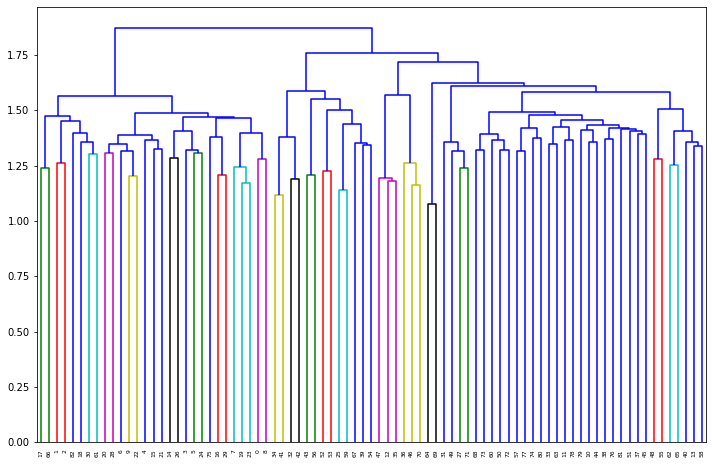

In [12]:
model = AgglomerativeClustering(n_clusters=None, distance_threshold=0).fit(tf_idf_array)
link_matrix = linkage_matrix(tf_idf_array.shape[0], model.children_, model.distances_)
plt.figure(figsize=(12,8))
dendrogram(link_matrix);